In [1]:
### importing things we need
##Lil bro you better finish this analysis quick
import numpy as np
import dask
import dask.array as da
from glob import glob
from h5py import File
import matplotlib.pyplot as plt
import imageio
from PIL import Image
import os
import shutil
from glob import glob
import sys
import numpy as np 
%matplotlib inline
sys.path.append('C:\\Users\\chena\\Documents\\GitHub\\local\\notebooks\\_alex_yu_data_analysis\\modules\\')
sys.path.append('C:\\Users\\chena\\Documents\\GitHub\\local\\notebooks\\_alex_yu_data_analysis\\')
import modules
import fish
import ephys
import matplotlib.pyplot as plt
%matplotlib inline

import importEphys as ime
import scipy.io
from scipy.signal import find_peaks
from pandas import read_csv

In [77]:
pre_im = [r'Z:\Alex\f1\f1_pre.npy',r'Z:\Alex\f2\f2_pre.npy',r'Z:\Alex\f3\f3_pre.npy',
          r'Z:\Alex\reviewsS7_vehicle\f1_20241026_140756\seg\glialca.npy',
          r'Z:\Alex\reviewsS7_vehicle\f2_pre_good_20241026_155743\seg\glialca.npy',
          r'Z:\Alex\reviewsS7_vehicle\f3_pre_20241026_174709\seg\glialca.npy',
          r'Z:\Alex\reviewsS7_vehicle\fish4_pre_20241026_190834\seg\glialca.npy']
          
pre_swim = [r'Z:\Alex\ephys_SPIM1\swimRegressor_pre_f1.npy',r'Z:\Alex\ephys_SPIM1\swimRegressor_pre_f2.npy',r'Z:\Alex\ephys_SPIM1\swimRegressor_pre_f3.npy',
           r'Z:\Alex\reviewsS7_vehicle\swimFrame_f1_pre.npy', r'Z:\Alex\reviewsS7_vehicle\swimFrame_f2_pre.npy',r'Z:\Alex\reviewsS7_vehicle\swimFrame_f3_pre.npy',r'Z:\Alex\reviewsS7_vehicle\swimFrame_f4_pre.npy']
#pre_struggle = [r'Z:\Alex\ephys_SPIM1\f1_strugs_pre.npy',r'Z:\Alex\ephys_SPIM1\f2_strugs_pre.npy',r'Z:\Alex\ephys_SPIM1\f3_strugs_pre.npy']

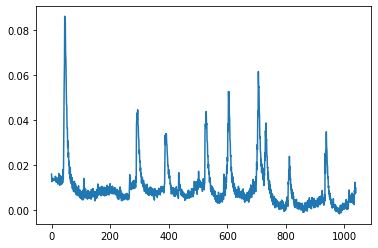

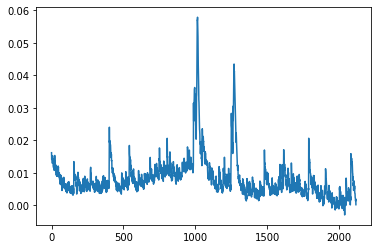

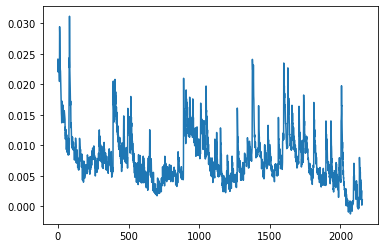

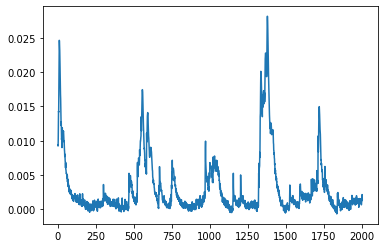

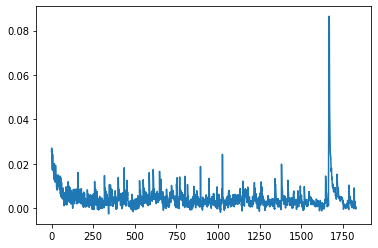

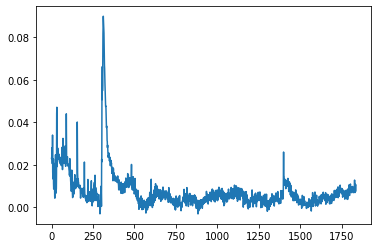

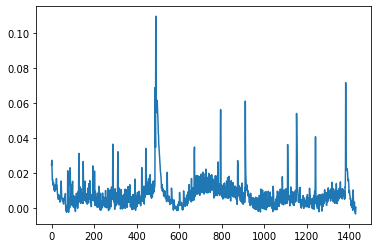

In [78]:
for i in range(len(pre_im)):
    dff = np.load(pre_im[i])
    plt.figure()
    plt.plot(dff)

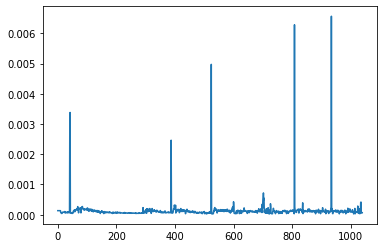

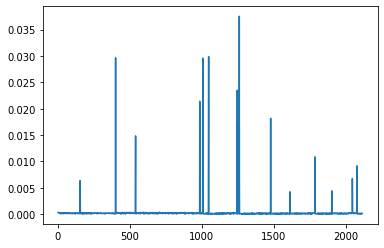

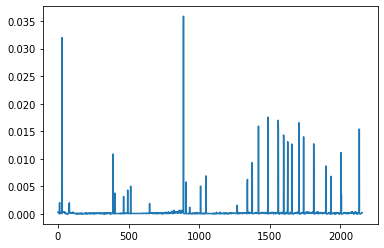

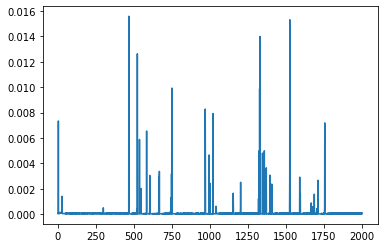

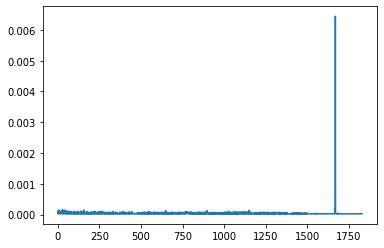

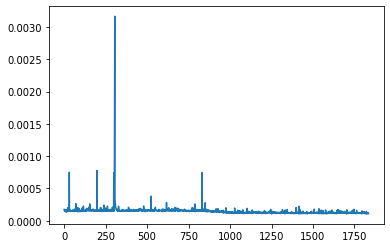

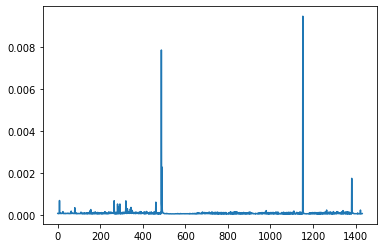

In [79]:
for i in range(len(pre_im)):
    swims = np.load(pre_swim[i])
    plt.figure()
    plt.plot(swims)

In [80]:
from scipy.signal import find_peaks

In [81]:
threshs = [0.001,0.005, 0.005, 0.002, 0.001, 0.0005, 0.001]
allStrugs = []
for i in range(len(threshs)):
    swims = np.load(pre_swim[i])
    thresh = threshs[i]
    strugs,_ = find_peaks(swims, height = thresh, distance = 60)
    allStrugs.append(strugs)
    print(len(strugs))

5
9
15
12
1
4
3


C:\Users\chena\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


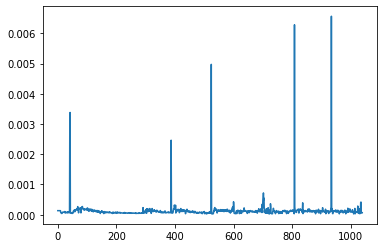

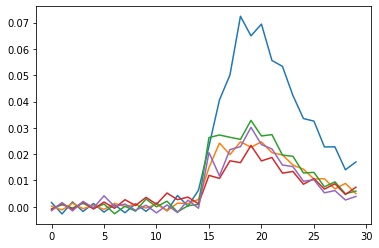

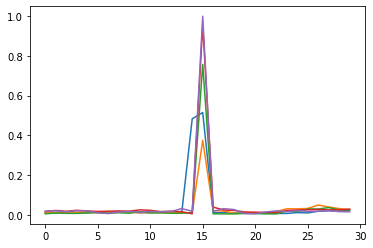

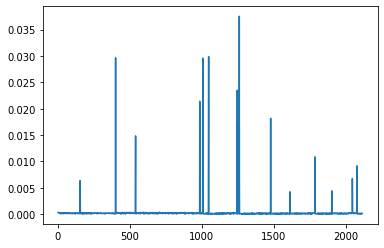

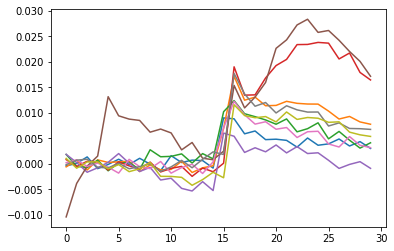

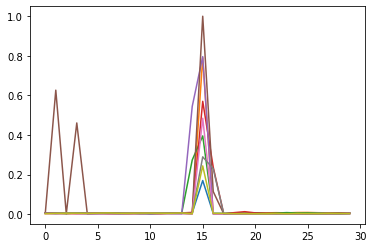

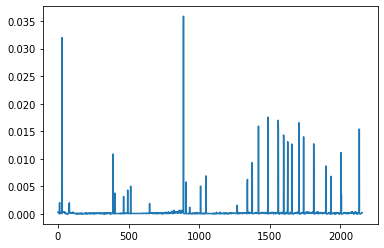

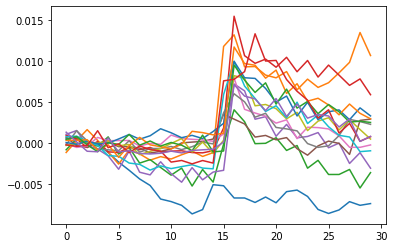

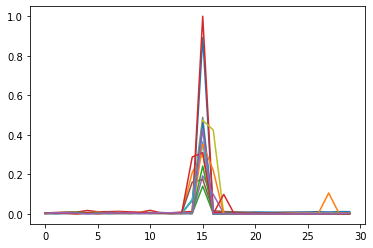

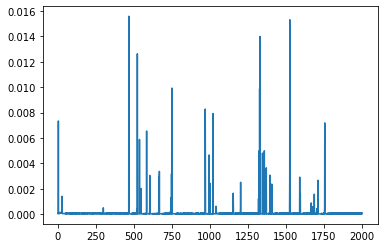

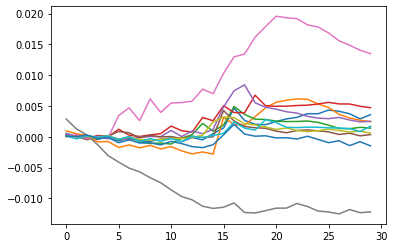

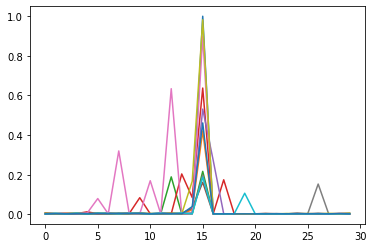

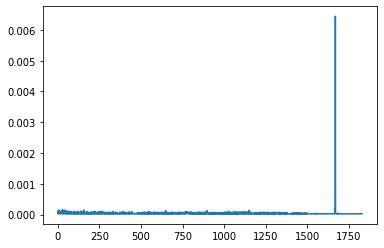

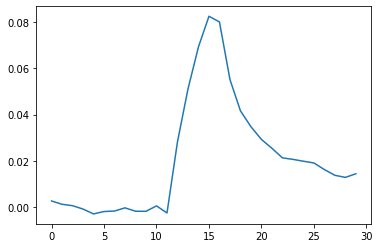

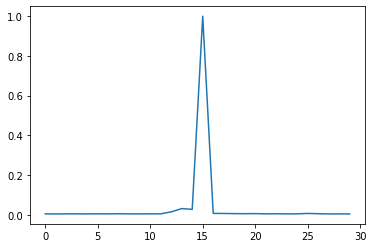

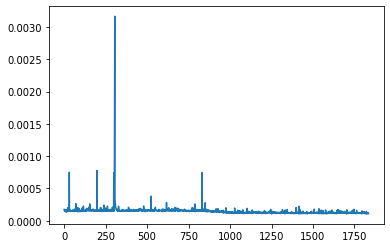

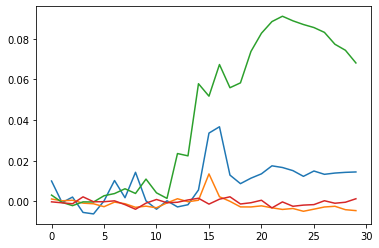

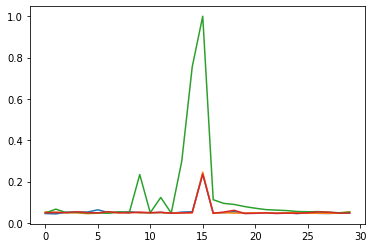

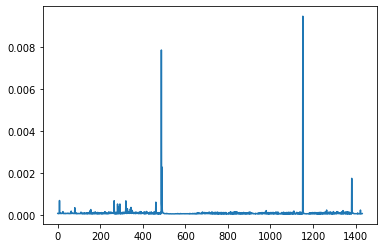

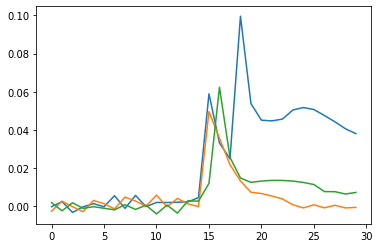

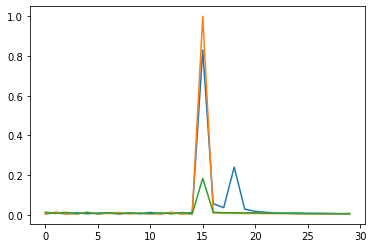

In [82]:
fish_avg = np.zeros([len(threshs),30])
fish_se = np.zeros([len(threshs),30])
fish_avg_swim = np.zeros([len(threshs),30])
fish_se_swim = np.zeros([len(threshs),30])
for i in range(len(pre_im)):
    dff = np.load(pre_im[i])
    swims = np.load(pre_swim[i])
    plt.figure()
    plt.plot(swims)
    strugs = allStrugs[i]
    #strugs[np.where(strugs > (len(dff)-20))] = []
    numStrug = len(strugs)
    strug_trig = []
    strug_trig_swims = []
    for j in range(numStrug):
        strug = int(strugs[j])
        if (strug < (len(dff - 15)) and (strug > 15)):
            strug_trig.append(dff[(strug-15):(strug+15)])
            strug_trig_swims.append(swims[(strug-15):(strug+15)])
    numTrig = len(strug_trig)
    strugTrigMat = np.zeros([numTrig,30])
    strugSwimMat = np.zeros([numTrig,30])
    for j in range(numTrig):
        strugTrigMat[j] = strug_trig[j]- np.mean(strug_trig[j][0:5])
        strugSwimMat[j] = strug_trig_swims[j]
    fish_avg[i] = np.mean(strugTrigMat,axis=0)
    fish_se[i] = np.std(strugTrigMat,axis=0)/np.sqrt(len(strugTrigMat))
    strugSwimMat = strugSwimMat / np.max(strugSwimMat)
    fish_avg_swim[i] = np.mean(strugSwimMat,axis=0)
    fish_se_swim[i] = np.std(strugSwimMat,axis=0)/np.sqrt(len(strugSwimMat))
    plt.figure()
    plt.plot(strugTrigMat.T)
    plt.figure()
    plt.plot(strugSwimMat.T)

In [93]:
np.save(r'Z:\Alex\compiled_pre_revision.npy',fish_avg)
pd.DataFrame(fish_avg).to_csv(r'Z:\Alex\compiled_pre_revision.csv')

In [84]:
pre_im = [r'Z:\Alex\f1\f1_post.npy',r'Z:\Alex\f2\f2_post.npy',r'Z:\Alex\f3\f3_post.npy',
          r'Z:\Alex\reviewsS7_vehicle\f1_post_20241026_143926\seg\glialca.npy',
          r'Z:\Alex\reviewsS7_vehicle\f2_post_good_20241026_162253\seg\glialca.npy',
          r'Z:\Alex\reviewsS7_vehicle\f3_post_20241026_180826\seg\glialca.npy',
          r'Z:\Alex\reviewsS7_vehicle\fish4_post_20241026_204010\seg\glialca.npy']
pre_swim = [r'Z:\Alex\ephys_SPIM1\swimRegressor_post_f1.npy',r'Z:\Alex\ephys_SPIM1\swimRegressor_post_f2.npy',r'Z:\Alex\ephys_SPIM1\swimRegressor_post_f3.npy',
           r'Z:\Alex\reviewsS7_vehicle\swimFrame_f1_post.npy', r'Z:\Alex\reviewsS7_vehicle\swimFrame_f2_post.npy',r'Z:\Alex\reviewsS7_vehicle\swimFrame_f3_post.npy',r'Z:\Alex\reviewsS7_vehicle\swimFrame_f4_post.npy']

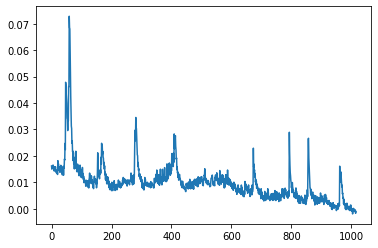

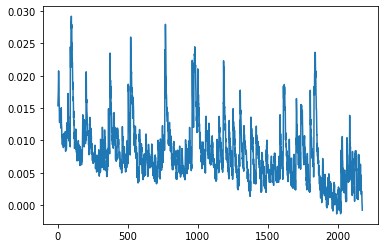

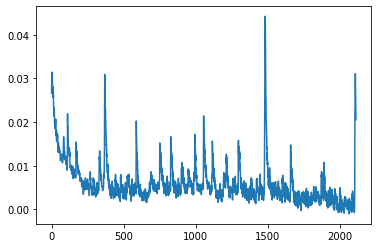

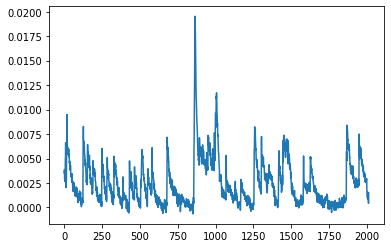

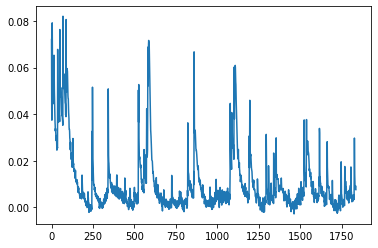

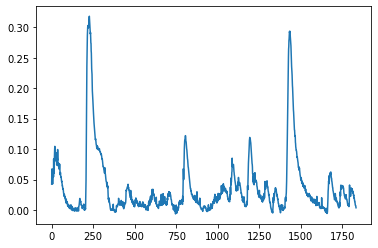

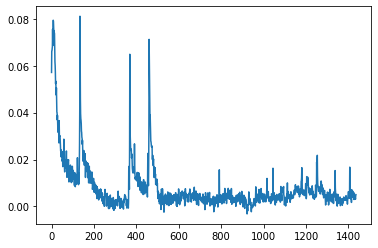

In [85]:
for i in range(len(pre_im)):
    dff = np.load(pre_im[i])
    plt.figure()
    plt.plot(dff)

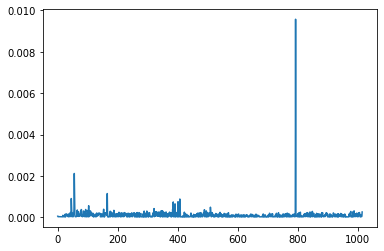

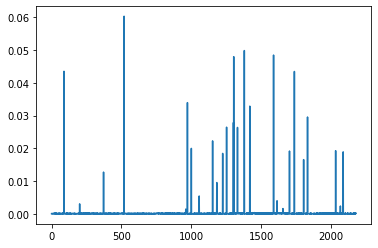

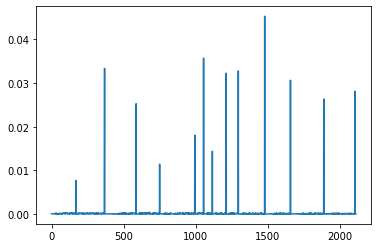

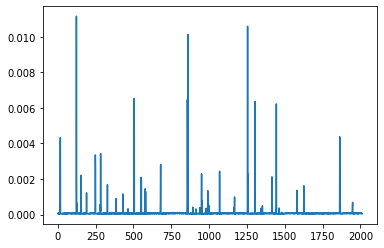

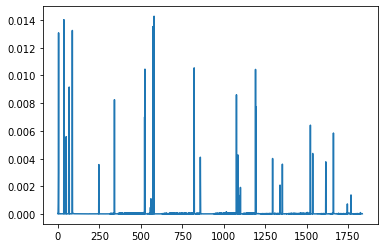

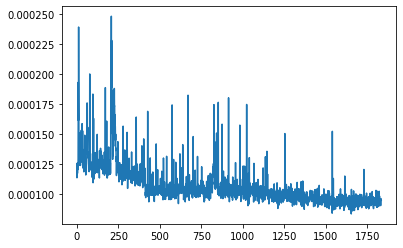

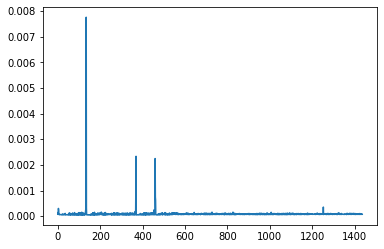

In [86]:
for i in range(len(pre_swim)):
    swim = np.load(pre_swim[i])
    plt.figure()
    plt.plot(swim)

In [87]:
threshs = [0.001,0.01, 0.01, 0.002, 0.001, 0.000181, 0.001]
allStrugs = []
for i in range(len(threshs)):
    swims = np.load(pre_swim[i])
    thresh = threshs[i]
    strugs,_ = find_peaks(swims, height = thresh, distance = 60)
    allStrugs.append(strugs)
    print(len(strugs))

3
12
12
11
11
4
3


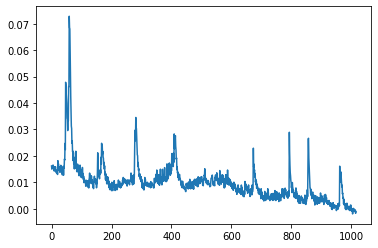

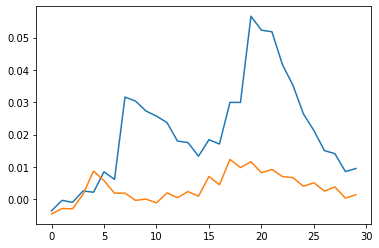

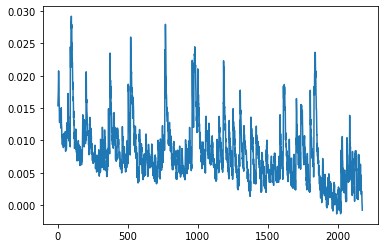

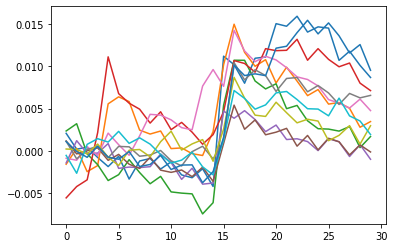

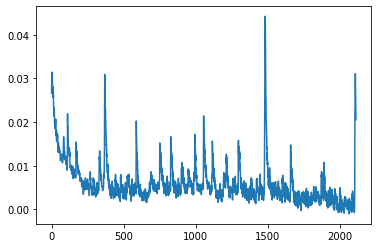

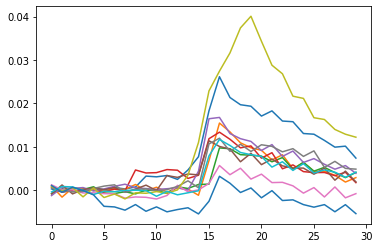

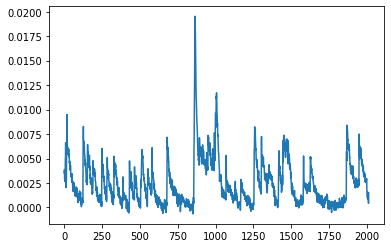

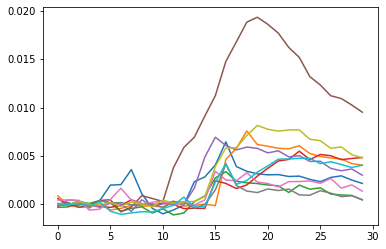

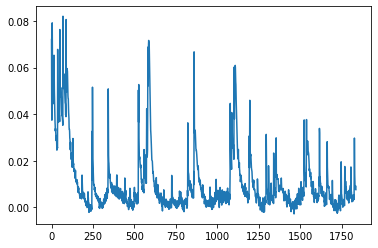

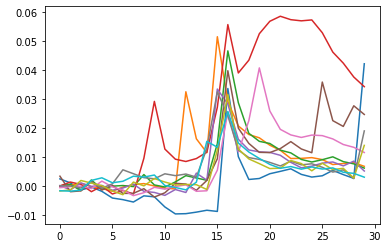

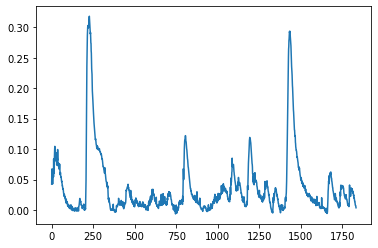

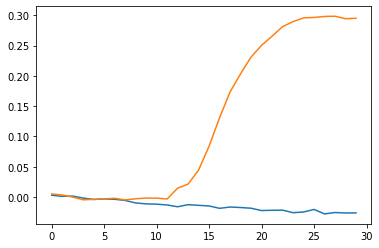

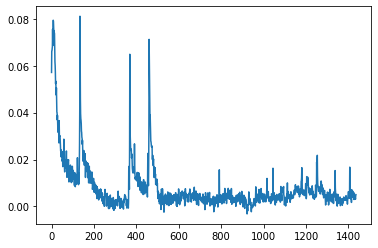

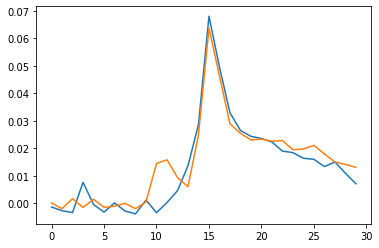

In [88]:
fish_post_avg =np.zeros([len(threshs),30])
fish_post_se = np.zeros([len(threshs),30])
for i in range(len(pre_im)):
    dff = np.load(pre_im[i])
    plt.figure()
    plt.plot(dff)
    strugs =allStrugs[i]
    #strugs[np.where(strugs > (len(dff)-20))] = []
    numStrug = len(strugs)
    strug_trig = []
    for j in range(numStrug):
        strug = int(strugs[j])
        if (strug < (len(dff - 15)) and (strug > 15)):
            strug_trig.append(dff[(strug-15):(strug+15)])
    numTrig = len(strug_trig)
    strugTrigMat = np.zeros([numTrig-1,30])
    for j in range(numTrig-1):
        strugTrigMat[j] = strug_trig[j]- np.mean(strug_trig[j][0:5])
    fish_post_avg[i] = np.mean(strugTrigMat,axis=0)
    fish_post_se[i] = np.std(strugTrigMat,axis=0)/np.sqrt(len(strugTrigMat))
    plt.figure()
    plt.plot(strugTrigMat.T)

In [89]:
np.shape(fish_post_avg)

(7, 30)

In [91]:
import pandas as pd

In [92]:
np.save(r'Z:\Alex\compiled_post_revision.npy',fish_post_avg)
pd.DataFrame(fish_post_avg).to_csv(r'Z:\Alex\compiled_post_revision.csv')

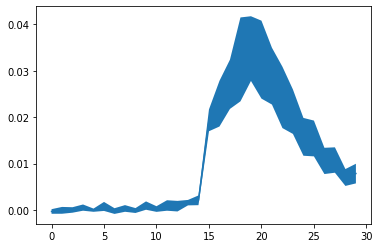

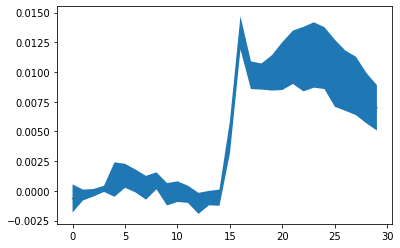

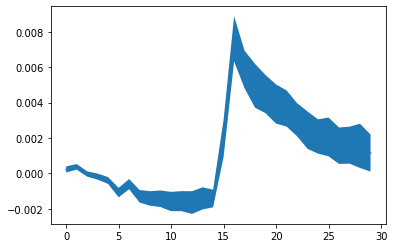

In [73]:
for i in range(3):
    plt.figure()
    plt.plot(fish_avg[i])
    plt.fill_between(range(len(fish_avg[i])),fish_avg[i]-fish_se[i],fish_avg[i]+fish_se[i])
    #plt.plot(fish_post_avg[i])
    #plt.fill_between(range(len(fish_post_avg[i])),fish_post_avg[i]-fish_post_se[i],fish_post_avg[i]+fish_post_se[i])

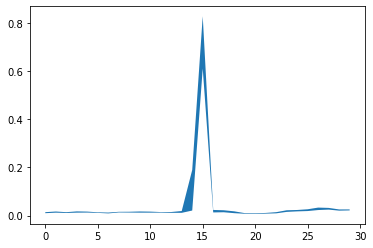

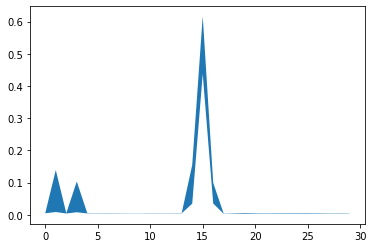

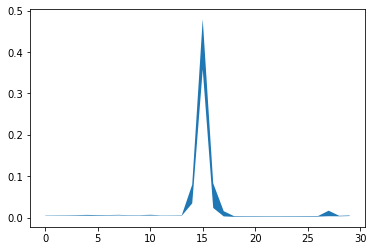

In [72]:
for i in range(3):
    plt.figure()
    #plt.plot(fish_avg[i])
    plt.fill_between(range(len(fish_avg_swim[i])),fish_avg_swim[i]-fish_se_swim[i],fish_avg_swim[i]+fish_se_swim[i])
    

In [66]:
np.save(r'Z:\Alex\pre_avg_swim.npy',fish_avg_swim)

In [139]:
np.save(r'Z:\Alex\pre_avg_new.npy',fish_avg)
#np.save(r'Z:\Alex\post_avg.npy',fish_post_avg)